<a href="https://colab.research.google.com/github/Violin1208/CFG_carbonhack/blob/main/MLweek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09/02/22
Convolutional Neural Network trained on MNIST dataset downloaded via keras

In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Check the size of each variable


In [5]:
print('X_train: '+ str(X_train.shape))
print('Y_train: '+ str(y_train.shape))
print('X_test: '+ str(X_test.shape))
print('Y_test: '+ str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


How many numbers in the dataset

In [7]:
print('The labels in the training dataset are',np.unique(y_train))
print('The labels in the test dataset are',np.unique(y_test))

The labels in the training dataset are [0 1 2 3 4 5 6 7 8 9]
The labels in the test dataset are [0 1 2 3 4 5 6 7 8 9]


Viz using matplotlib

In [10]:
from matplotlib import pyplot as plt

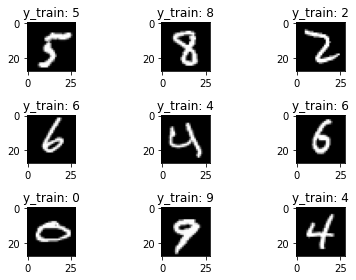

In [14]:
random_numbers = np.random.choice(len(X_train), size=9)

fig, ax = plt.subplots(3,3)

for i, index in enumerate(random_numbers):
  ax[i//3, i%3].imshow(X_train[index], cmap=plt.get_cmap('gray'))
  ax[i//3, i%3].set_title('y_train: %d' %y_train[index])
plt.tight_layout()

Model using keras with tensorflow

In [15]:
import tensorflow as tf


In [16]:
inputs = tf.keras.Input(shape=(28,28,1), name='input')
# 2D Covolution layer with 16 neurons and kernel size of 5x5
#32 layers and 3 by 3 (kernel size) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
#window of 2x2, not necessary to put 32 as it will be the same
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.Dense(16)(x)

#10 neurons here are my final 10 outputs
outputs = tf.keras.layers.Dense(10, activation='sigmoid')(x)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])


opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()


acc = tf.keras.metrics.SparseCategoricalAccuracy()
#compile into a package
model.compile(optimizer=opt, loss=loss, metrics=[acc])
#summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                             